## Technical Analysis of the FAANG Stocks (Facebook, Apple, Amazon, Netflx, Google) and the S&P500

In [30]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

###  Importing Stock Data from 2014-01-02 to Present (2019-02-13) from the Yahoo API

In [31]:
tickers = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL', '^GSPC']
data = pd.DataFrame()

#for t in tickers:
#    data[t] = web.DataReader(t,'yahoo','2014-01-01')['Adj Close']

#data.to_csv('faang_stock_prices')

data = pd.read_csv('faang_stock_prices', index_col='Date')

In [32]:
volume = pd.DataFrame()

#for t in tickers:
#    volume[t] = web.DataReader(t,'yahoo','2014-01-01')['Volume']

#volume.to_csv('faang_stock_trading_volume')

volume =pd.read_csv('faang_stock_trading_volume', index_col='Date')

volume.index = pd.to_datetime(volume.index, format='%Y-%m-%d')

### Risk and Return of FAANG Stocks using the S&P500 as a Benchmark

In [33]:
log_returns = np.log(data/data.shift()) # logarithmic returns of stocks and the S&P500

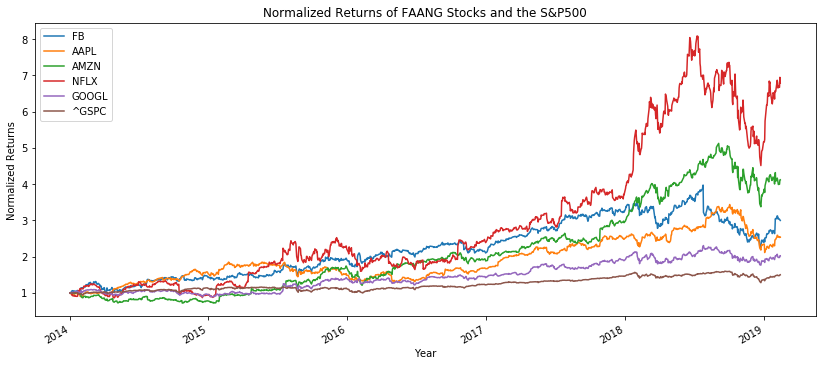

In [34]:
# Normalizing the returns
normalized_returns = data/data.iloc[0]
normalized_returns.index = pd.to_datetime(normalized_returns.index, format='%Y-%m-%d')
normalized_returns.plot(figsize=(14,6))
plt.xlabel('Year')
plt.ylabel('Normalized Returns')
plt.title('Normalized Returns of FAANG Stocks and the S&P500')
plt.savefig('./Figures/Normalized_Returns_of_FAANG_Stocks_and_the_S&P500')

In [35]:
normalized_returns.iloc[-1]

FB       2.998903
AAPL     2.541353
AMZN     4.120914
NFLX     6.786809
GOOGL    2.025840
^GSPC    1.502762
Name: 2019-02-13 00:00:00, dtype: float64

In [36]:
expected_return_annual = log_returns.mean() * 252
expected_return_annual

FB       0.215041
AAPL     0.182626
AMZN     0.277273
NFLX     0.374961
GOOGL    0.138235
^GSPC    0.079752
dtype: float64

In [37]:
expected_volatility_annual = log_returns.std() * 252 ** 0.5
expected_volatility_annual

FB       0.303917
AAPL     0.246608
AMZN     0.310507
NFLX     0.429250
GOOGL    0.233165
^GSPC    0.133359
dtype: float64

In [38]:
# Correlation of the FAANG stocks to the S&P500
corr = log_returns.corr()
corr

,FB,AAPL,AMZN,NFLX,GOOGL,^GSPC
FB,1.000000,0.409706,0.543091,0.397088,0.607546,0.556701
AAPL,0.409706,1.000000,0.436421,0.333096,0.483205,0.628021
AMZN,0.543091,0.436421,1.000000,0.459405,0.630393,0.582655
NFLX,0.397088,0.333096,0.459405,1.000000,0.467030,0.471941
GOOGL,0.607546,0.483205,0.630393,0.467030,1.000000,0.684646
^GSPC,0.556701,0.628021,0.582655,0.471941,0.684646,1.000000


###  Calculating and Plotting Bollinger Bands of FAANG Stocks over a 20 Day Simple Moving Average

In [39]:
fb_bollinger = pd.DataFrame(index=data.index)
volume.index = pd.to_datetime(volume.index, format='%Y-%m-%d')
fb_bollinger.index = pd.to_datetime(fb_bollinger.index, format='%Y-%m-%d')
fb_bollinger['Close Price'] = data['FB']
fb_bollinger['MA 20 Days'] = data['FB'].rolling(20).mean()
fb_bollinger['Upper'] = fb_bollinger['MA 20 Days'] + 2 * data['FB'].rolling(20).std()
fb_bollinger['Lower'] = fb_bollinger['MA 20 Days'] - 2 * data['FB'].rolling(20).std()

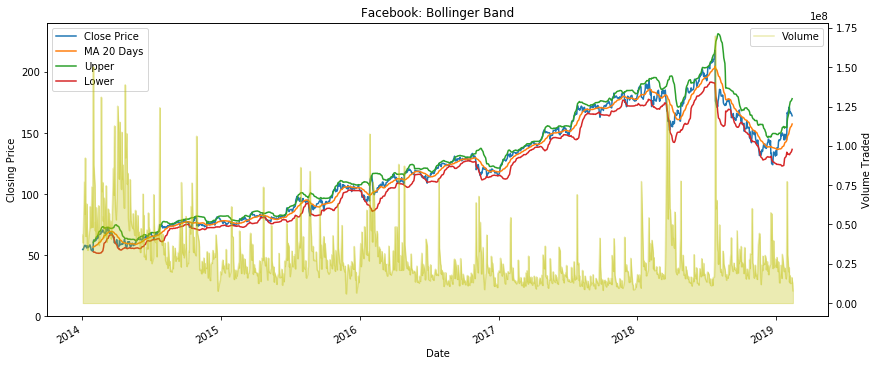

In [40]:
fb_bollinger.plot(figsize=(14,6))
plt.title('Facebook: Bollinger Band')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc=1)
volume['FB'].plot(kind='area', secondary_y=True, color='y', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.legend(labels=['Volume'], loc=0)
plt.savefig('./Figures/Facebook_Bollinger_Band')

In [41]:
aapl_bollinger = pd.DataFrame(index=data.index)
aapl_bollinger.index = pd.to_datetime(aapl_bollinger.index, format='%Y-%m-%d')
aapl_bollinger['Close Price'] = data['AAPL']
aapl_bollinger['MA 20 Days'] = data['AAPL'].rolling(20).mean()
aapl_bollinger['Upper'] = aapl_bollinger['MA 20 Days'] + 2 * data['AAPL'].rolling(20).std()
aapl_bollinger['Lower'] = aapl_bollinger['MA 20 Days'] - 2 * data['AAPL'].rolling(20).std()

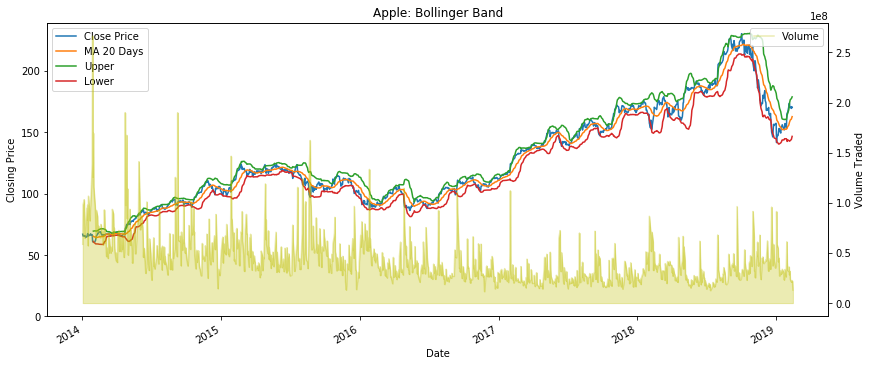

In [42]:
aapl_bollinger.plot(figsize=(14,6))
plt.title('Apple: Bollinger Band')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc=1)
volume['AAPL'].plot(kind='area', secondary_y=True, color='y', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.legend(labels=['Volume'], loc=0)
plt.savefig('./Figures/Apple_Bollinger_Band')

In [43]:
amzn_bollinger = pd.DataFrame(index=data.index)
amzn_bollinger.index = pd.to_datetime(amzn_bollinger.index, format='%Y-%m-%d')
amzn_bollinger['Close Price'] = data['AMZN']
amzn_bollinger['MA 20 Days'] = data['AMZN'].rolling(20).mean()
amzn_bollinger['Upper'] = amzn_bollinger['MA 20 Days'] + 2 * data['AMZN'].rolling(20).std()
amzn_bollinger['Lower'] = amzn_bollinger['MA 20 Days'] - 2 * data['AMZN'].rolling(20).std()

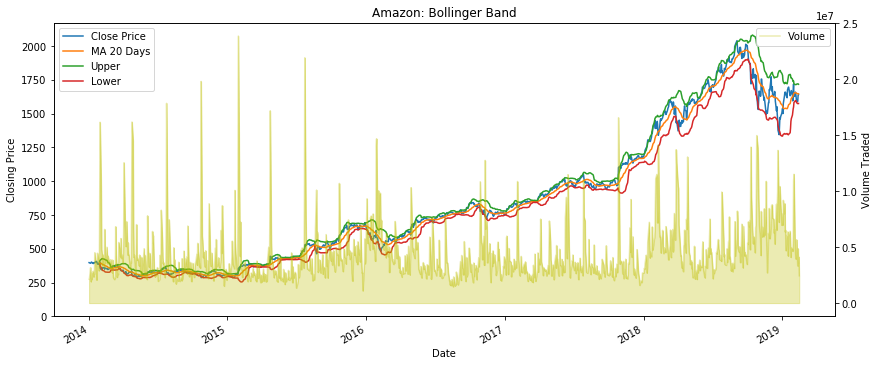

In [44]:
amzn_bollinger.plot(figsize=(14,6))
plt.title('Amazon: Bollinger Band')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc=1)
volume['AMZN'].plot(kind='area', secondary_y=True, color='y', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.legend(labels=['Volume'], loc=0)
plt.savefig('./Figures/Amazon_Bollinger_Band')

In [45]:
nflx_bollinger = pd.DataFrame(index=data.index)
nflx_bollinger.index = pd.to_datetime(nflx_bollinger.index, format='%Y-%m-%d')
nflx_bollinger['Close Price'] = data['NFLX']
nflx_bollinger['MA 20 Days'] = data['NFLX'].rolling(20).mean()
nflx_bollinger['Upper'] = nflx_bollinger['MA 20 Days'] + 2 * data['NFLX'].rolling(20).std()
nflx_bollinger['Lower'] = nflx_bollinger['MA 20 Days'] - 2 * data['NFLX'].rolling(20).std()

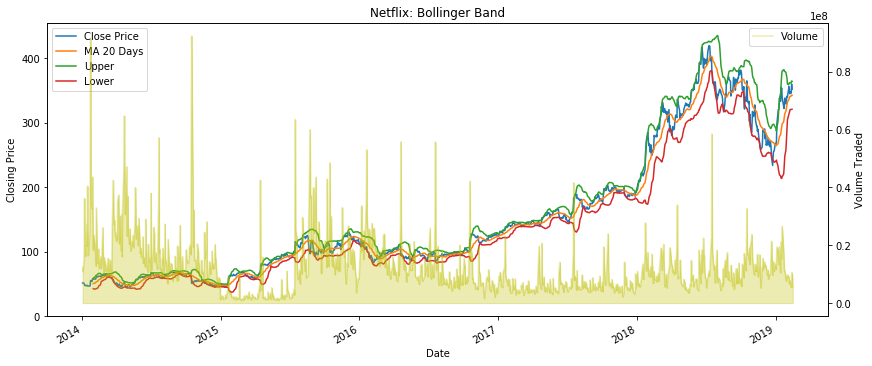

In [46]:
nflx_bollinger.plot(figsize=(14,6))
plt.title('Netflix: Bollinger Band')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc=1)
volume['NFLX'].plot(kind='area', secondary_y=True, color='y', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.legend(labels=['Volume'], loc=0)
plt.savefig('./Figures/Netflix_Bollinger_Band')

In [47]:
googl_bollinger = pd.DataFrame(index=data.index)
googl_bollinger.index = pd.to_datetime(googl_bollinger.index, format='%Y-%m-%d')
googl_bollinger['Close Price'] = data['GOOGL']
googl_bollinger['MA 20 Days'] = data['GOOGL'].rolling(20).mean()
googl_bollinger['Upper'] = googl_bollinger['MA 20 Days'] + 2 * data['GOOGL'].rolling(20).std()
googl_bollinger['Lower'] = googl_bollinger['MA 20 Days'] - 2 * data['GOOGL'].rolling(20).std()

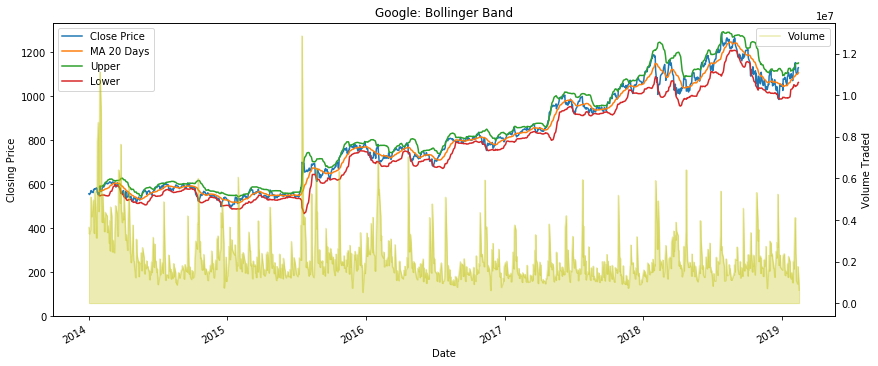

In [48]:
googl_bollinger.plot(figsize=(14,6))
plt.title('Google: Bollinger Band')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc=1)
volume['GOOGL'].plot(kind='area', secondary_y=True, color='y', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Volume Traded')
plt.legend(labels=['Volume'], loc=0)
plt.savefig('./Figures/Google_Bollinger_Band')

## Calculating the Beta against the S&P500 as a Benchmark

In [49]:
# The covariance of stocks to the S&P500
cov = log_returns.cov() * 252
cov

,FB,AAPL,AMZN,NFLX,GOOGL,^GSPC
FB,0.092365,0.030707,0.051250,0.051803,0.043052,0.022563
AAPL,0.030707,0.060815,0.033418,0.035260,0.027785,0.020654
AMZN,0.051250,0.033418,0.096414,0.061232,0.045640,0.024127
NFLX,0.051803,0.035260,0.061232,0.184255,0.046743,0.027016
GOOGL,0.043052,0.027785,0.045640,0.046743,0.054366,0.021289
^GSPC,0.022563,0.020654,0.024127,0.027016,0.021289,0.017785


In [50]:
fb_beta = cov.iloc[0,5] / cov.iloc[5,5]
fb_beta

1.268682810287218

In [51]:
aapl_beta = cov.iloc[1,5] / cov.iloc[5,5]
aapl_beta

1.1613357706369591

In [52]:
amzn_beta = cov.iloc[2,5] / cov.iloc[5,5]
amzn_beta

1.3566218338864156

In [53]:
nflx_beta = cov.iloc[3,5] / cov.iloc[5,5]
nflx_beta

1.5190583797444432

In [54]:
googl_beta = cov.iloc[4,5] / cov.iloc[5,5]
googl_beta

1.1970353373140996

### Portfolio Allocation of FAANG Stocks (Equally Weighted Portfolio)

In [55]:
portfolio_weight = [0.2, 0.2, 0.2, 0.2, 0.2]
portfolio_allocation = (data.drop(['^GSPC'], axis=1)/data.drop(['^GSPC'], axis=1).iloc[0]) * portfolio_weight
portfolio_allocation.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2014-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2014-01-03,0.199452,0.195607,0.199231,0.200154,0.198541
2014-01-06,0.209103,0.196673,0.197819,0.198208,0.200755
2014-01-07,0.211735,0.195267,0.200030,0.187145,0.204625
2014-01-08,0.212868,0.196504,0.201985,0.187966,0.205051


#### Initial Portfolio Value of $50,000

In [56]:
portfolio_value = 50000
portfolio_allocation['Total'] = portfolio_allocation.sum(axis=1)
portfolio_returns = portfolio_allocation * portfolio_value
portfolio_returns.iloc[-1]

FB        29989.034924
AAPL      25413.530682
AMZN      41209.136241
NFLX      67868.086797
GOOGL     20258.397225
Total    184738.185869
Name: 2019-02-13, dtype: float64

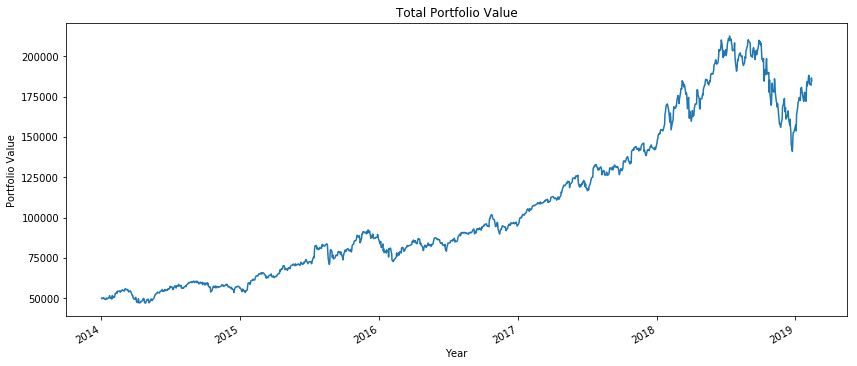

In [85]:
portfolio_returns['Total'].plot(figsize=(14,6))
portfolio_returns.index = pd.to_datetime(portfolio_returns.index, format='%Y-%m-%d')
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('Total Portfolio Value')
plt.savefig('./Figures/Total_Portfolio_Value')

### Cumulative Portfolio Return

In [58]:
print(str(round(portfolio_returns['Total'].iloc[-1] / portfolio_returns['Total'].iloc[0]*100, 2))+'%')

369.48%


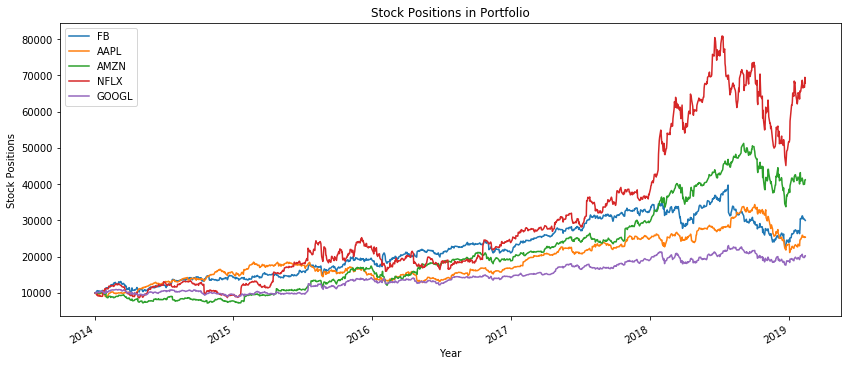

In [59]:
portfolio_returns.drop(['Total'], axis=1).plot(figsize=(14,6))
portfolio_returns.index = pd.to_datetime(portfolio_returns.index, format='%Y-%m-%d')
plt.xlabel('Year')
plt.ylabel('Stock Positions')
plt.title('Stock Positions in Portfolio')
plt.savefig('./Figures/Stock_Positions_in_Portfolio')

In [60]:
portfolio_returns.drop(['Total'], axis=1).iloc[-1]

FB       29989.034924
AAPL     25413.530682
AMZN     41209.136241
NFLX     67868.086797
GOOGL    20258.397225
Name: 2019-02-13 00:00:00, dtype: float64

In [61]:
cov = log_returns.cov()
cov

,FB,AAPL,AMZN,NFLX,GOOGL,^GSPC
FB,0.000367,0.000122,0.000203,0.000206,0.000171,0.000090
AAPL,0.000122,0.000241,0.000133,0.000140,0.000110,0.000082
AMZN,0.000203,0.000133,0.000383,0.000243,0.000181,0.000096
NFLX,0.000206,0.000140,0.000243,0.000731,0.000185,0.000107
GOOGL,0.000171,0.000110,0.000181,0.000185,0.000216,0.000084
^GSPC,0.000090,0.000082,0.000096,0.000107,0.000084,0.000071


In [62]:
annual_portfolio_return = np.log(portfolio_returns['Total']/portfolio_returns['Total'].shift()).mean() * 252
print('Annualized Expected Portfolio Returns: ' + str(round(annual_portfolio_return*100,2))+'%')

Annualized Expected Portfolio Returns: 25.59%


In [63]:
annual_portfolio_volatility = np.log(portfolio_returns['Total']/portfolio_returns['Total'].shift()).std() * 252 ** 0.5
print('Annualized Expected Portfolio Volatility: ' + str(round(annual_portfolio_volatility*100,2))+'%')

Annualized Expected Portfolio Volatility: 24.16%


### Calculating the Portfolio Sharpe Ratio (Assuming 2.5% as Risk Free Rate)

In [64]:
sharpe = (annual_portfolio_return - 0.025) / annual_portfolio_volatility
print('Sharpe Ratio of an Equally Weighted Portfolio: ' + str(round(sharpe, 4)))

Sharpe Ratio of an Equally Weighted Portfolio: 0.9557


### Random Portfolio Allocation Simulations to Find the Optimal Portfolio Weighting

In [65]:
weights_array = []
returns_array = []
volatility_array = []
sharpe_array = []

iterations = 25000

for x in range(0,iterations):
    
    # Rebalancing sum of weights to always equal 1
    weights = np.array(np.random.random(5))
    weights /= sum(weights)
    weights_array.append(weights)
    
    returns_array.append(np.sum(weights * log_returns.drop('^GSPC', axis=1).mean() * 252))
    
    volatility_array.append((np.dot(weights.T, np.dot(log_returns.drop('^GSPC', axis=1).cov() * 252, weights)))**0.5)
    
    sharpe_array.append((returns_array[x] - 0.025)/volatility_array[x])

weights_array = np.array(weights_array)
returns_array = np.array(returns_array)
volatility_array = np.array(volatility_array)
sharpe_array = np.array(sharpe_array)


### Finding the Maximium Sharpe Ration Position and it's Portfolio Weighting

In [66]:
sharpe_array.max()

0.9832358215588491

In [67]:
sharpe_array.argmax()

1145

In [68]:
weights_array[1145]

array([0.1005931 , 0.22806804, 0.33965769, 0.32846298, 0.00321819])

In [69]:
max_ret = returns_array[1145]
max_ret

0.28106661622660906

In [70]:
max_vol = volatility_array[1145]
max_vol

0.26043255403432514

### Plotting all Iterations and Marking the Point with the Highest Sharpe Ratio

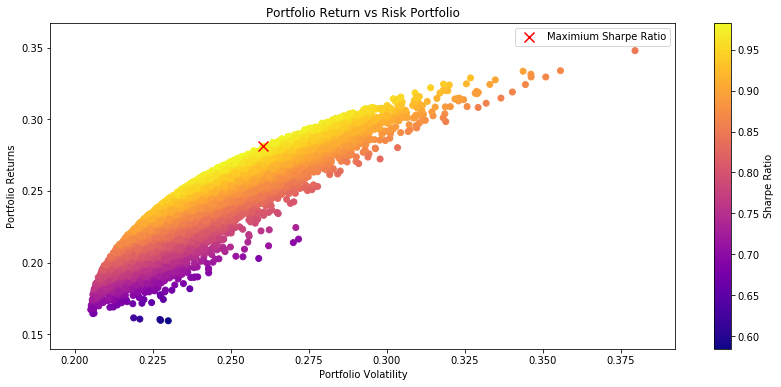

In [71]:
plt.figure(figsize = (14,6))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Return vs Risk Portfolio')

plt.scatter(max_vol, max_ret, c='red',s=100, marker='x', label='Maximium Sharpe Ratio')
plt.legend()

plt.savefig('./Figures/Portfolio_Return_vs_Risk_Portfolio')

### Using Mathematical Optimization and Using the Scipy Minimization Method

In [72]:
# Function that returns the Portfolio Return, Volatility, Sharpe Ratio as an array based on input weight
def get_ret_vol_sr(weight):
    weights = np.array(weight)
    ret = np.sum(log_returns.drop('^GSPC', axis=1).mean() * weight) * 252
    vol = np.dot(weights.T, np.dot(log_returns.drop('^GSPC', axis=1).cov() * 252, weights)**0.5)
    sr = (ret - 0.025)/vol
    return np.array([ret, vol, sr])

In [73]:
# Function that minimizes the Sharpe Ratio value
def neg_sharpe(weight):
    return get_ret_vol_sr(weight)[2] * -1

# Constraint function to check if the sum of the weights equal 1
def check_sum(weight):
    return np.sum(weight) - 1

cons = ({'type': 'eq', 'fun': check_sum})

bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))

init_guess = np.ones(len(log_returns.columns)-1) / (len(log_returns.columns)-1)

# Sequential Least Squares Algorithm
optimal_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [74]:
optimal_results

     fun: -0.9968376738960109
     jac: array([0.40113997, 0.40118128, 0.40085372, 0.40132097, 0.56120103])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.07667288, 0.25447298, 0.33412341, 0.33473073, 0.        ])

In [75]:
optimal_results.x

array([0.07667288, 0.25447298, 0.33412341, 0.33473073, 0.        ])

In [76]:
get_ret_vol_sr(optimal_results.x)

array([0.2811158 , 0.25692829, 0.99683767])

### Finding the Maximium Return for a Given Volatility, Plotting the Efficient Frontier Curve

In [77]:
# Defining min and max range of the Y-Axis (Portfolio Returns)
frontier_y = np.linspace(0, 0.375,100)

# Returns the value of volatility for minimization
def minimize_volatility(w):
    return get_ret_vol_sr(w)[1]

frontier_volatility = []

# Minimizing the Portfolio Volatility for a given value of a Portfolio Return with the same parameters from the previous
# Minimization Test (Sharpe Ratio)
for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

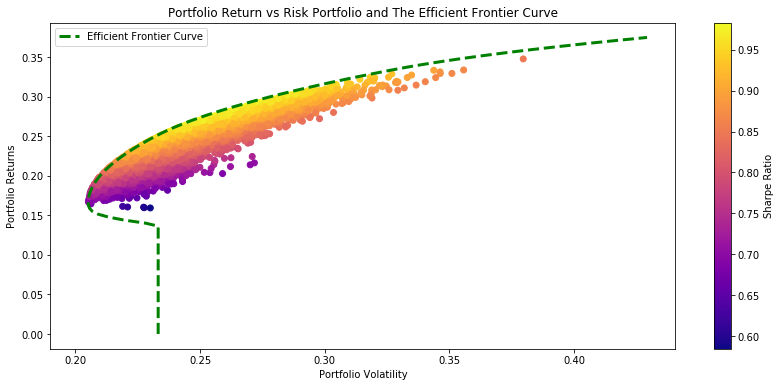

In [78]:
plt.figure(figsize = (14,6))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Return vs Risk Portfolio and The Efficient Frontier Curve')
plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3, label='Efficient Frontier Curve')
plt.legend()

plt.savefig('./Figures/Portfolio_Return_vs_Risk_Portfolio_and_The_Efficient_Frontier_Curve')

### Forecasting Stock Prices uses Monte Carlo Simulations

In [79]:
# Parameters of the Monte Carlo Simulations, 10 Different Iterations of the next 252 Trading Days using a normally
#  distributed, randomized Z variable based on historical stock prices and trends
t_interval = 252
i = 10
Z = norm.ppf(np.random.rand(t_interval, i))

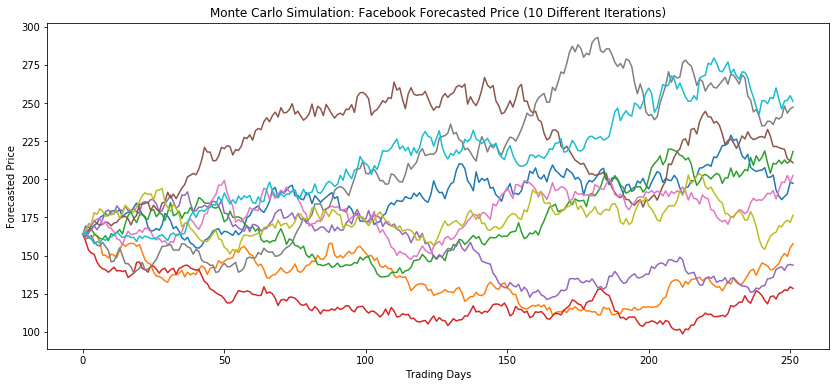

In [80]:
fb_daily_returns = np.exp(log_returns['FB'].mean() - 0.5 * log_returns['FB'].var()) + (log_returns['FB'].std() * Z)
fb_projection = np.zeros_like(fb_daily_returns)
fb_projection[0] = data['FB'].iloc[-1]

for t in range(1, t_interval):
    fb_projection[t] = fb_projection[t-1] * fb_daily_returns[t]

plt.figure(figsize=(14,6))
plt.plot(fb_projection)
plt.xlabel('Trading Days')
plt.ylabel('Forecasted Price')
plt.title('Monte Carlo Simulation: Facebook Forecasted Price (10 Different Iterations)')
plt.savefig('./Figures/Monte_Carlo_Simulation_Facebook_Forecasted_Price')

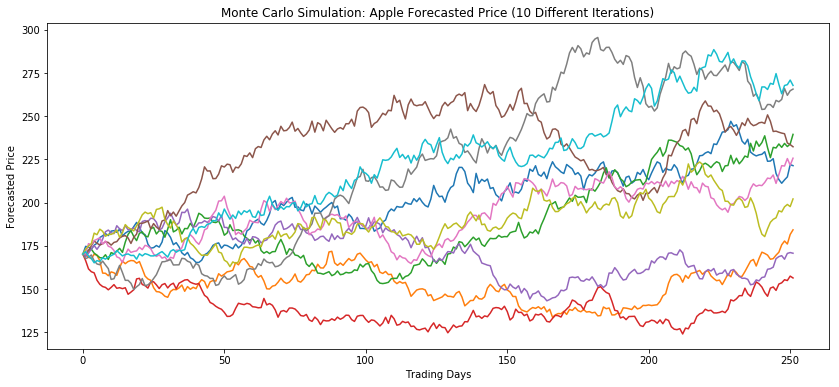

In [81]:
aapl_daily_returns = np.exp((log_returns['AAPL'].mean() + 0.5 * log_returns['AAPL'].var())+log_returns['AAPL'].std() * Z)
aapl_projection = np.zeros_like(aapl_daily_returns)
aapl_projection[0] = data['AAPL'].iloc[-1]

for t in range(1, t_interval):
    aapl_projection[t] = aapl_projection[t-1] * aapl_daily_returns[t]
    
plt.figure(figsize=(14,6))
plt.plot(aapl_projection)
plt.xlabel('Trading Days')
plt.ylabel('Forecasted Price')
plt.title('Monte Carlo Simulation: Apple Forecasted Price (10 Different Iterations)')
plt.savefig('./Figures/Monte_Carlo_Simulation_Apple_Forecasted_Price')

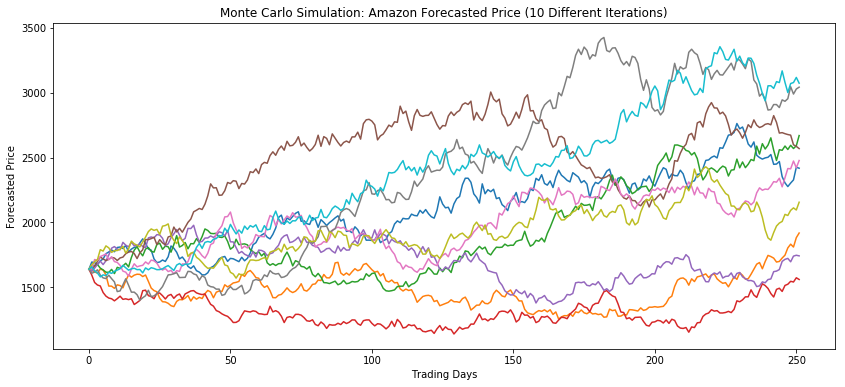

In [82]:
amzn_daily_returns = np.exp((log_returns['AMZN'].mean() + 0.5 * log_returns['AMZN'].var())+log_returns['AMZN'].std() * Z)
amzn_projection = np.zeros_like(amzn_daily_returns)
amzn_projection[0] = data['AMZN'].iloc[-1]

for t in range(1, t_interval):
    amzn_projection[t] = amzn_projection[t-1] * amzn_daily_returns[t]
    
plt.figure(figsize=(14,6))
plt.plot(amzn_projection)
plt.xlabel('Trading Days')
plt.ylabel('Forecasted Price')
plt.title('Monte Carlo Simulation: Amazon Forecasted Price (10 Different Iterations)')
plt.savefig('./Figures/Monte_Carlo_Simulation_Amazon_Forecasted_Price')

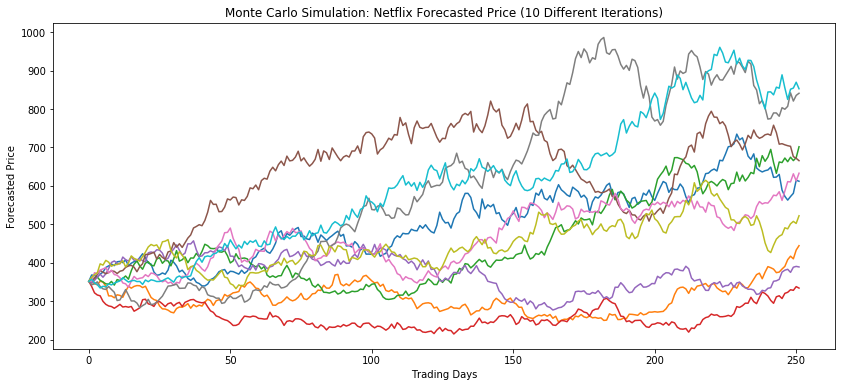

In [83]:
nflx_daily_returns = np.exp((log_returns['NFLX'].mean() + 0.5 * log_returns['NFLX'].var())+log_returns['NFLX'].std() * Z)
nflx_projection = np.zeros_like(nflx_daily_returns)
nflx_projection[0] = data['NFLX'].iloc[-1]

for t in range(1, t_interval):
    nflx_projection[t] = nflx_projection[t-1] * nflx_daily_returns[t]
    
plt.figure(figsize=(14,6))
plt.plot(nflx_projection)
plt.xlabel('Trading Days')
plt.ylabel('Forecasted Price')
plt.title('Monte Carlo Simulation: Netflix Forecasted Price (10 Different Iterations)')
plt.savefig('./Figures/Monte_Carlo_Simulation_Netflix_Forecasted_Price')

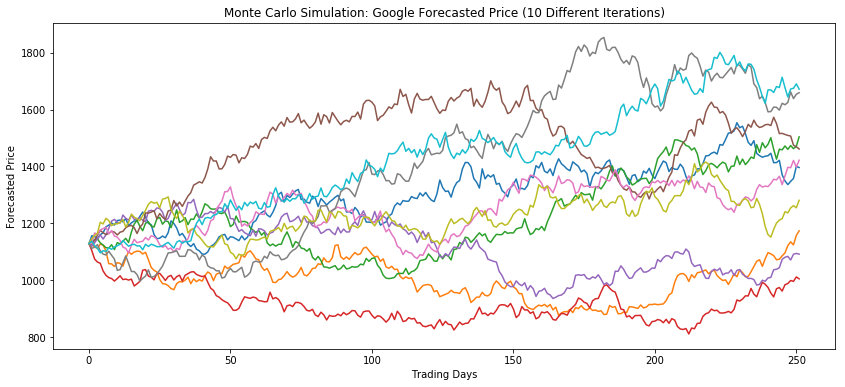

In [84]:
googl_daily_returns = np.exp((log_returns['GOOGL'].mean() + 0.5 * log_returns['GOOGL'].var())+log_returns['GOOGL'].std() * Z)
googl_projection = np.zeros_like(googl_daily_returns)
googl_projection[0] = data['GOOGL'].iloc[-1]

for t in range(1, t_interval):
    googl_projection[t] = googl_projection[t-1] * googl_daily_returns[t]
    
plt.figure(figsize=(14,6))
plt.plot(googl_projection)
plt.xlabel('Trading Days')
plt.ylabel('Forecasted Price')
plt.title('Monte Carlo Simulation: Google Forecasted Price (10 Different Iterations)')
plt.savefig('./Figures/Monte_Carlo_Simulation_Google_Forecasted_Price')